In [60]:
import re
import nltk
nltk.download('stopwords')
import string
string.punctuation

stopword = nltk.corpus.stopwords.words('english')

def to_lower_case(text):
    return str(text).lower()

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

def tokenize(text):
    split=re.split("\W+",text) 
    return split

def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text


    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AyanSau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
import torch
import numpy as np

def sen_to_vec(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=52
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

def sen_to_vec_cat(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=3
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

In [62]:
import pandas as pd

df_microcenter=pd.read_excel("MicroCenter_catagorized.xlsx").drop("Unnamed: 0",axis=1)
df_microcenter=df_microcenter.dropna()
df_microcenter=df_microcenter[df_microcenter["Is_Leasable"]=="Leasable"]
df_microcenter=df_microcenter.applymap(to_lower_case)
df_microcenter=df_microcenter.applymap(remove_punctuation)
df_microcenter=df_microcenter.applymap(tokenize)
df_microcenter=df_microcenter.applymap(remove_stopwords)
df_microcenter=df_microcenter.applymap(lambda x:" ".join(x))
df_microcenter["Is_Leasable"]=df_microcenter["Is_Leasable"].apply(lambda x:1 if x=="Leasable" else 0)
df_microcenter=df_microcenter.drop("Category",axis=1)
# taking only 500 rows to test
df_microcenter=df_microcenter.head(n=1000)

# finding all possible combinations
from itertools import combinations
comb = combinations(df_microcenter["name"].tolist(), 2) 
comb_list=list(map(lambda x:list(x),comb))

def vectorize(sentences):
    return list(map(sen_to_vec,sentences))

df_microcenter=pd.DataFrame()
df_microcenter["Combinations"]=comb_list
df_microcenter["Arrays"]=df_microcenter["Combinations"].apply(vectorize)

import math
from scipy import spatial

#(v1 dot v2)/{||v1||*||v2||}
def cosine_similarity(array):
    v1=list(array[0])
    v2=list(array[1])
    
    return 1 - spatial.distance.cosine(v1, v2)


df_microcenter["similarity"]=df_microcenter["Arrays"].apply(cosine_similarity)
df_microcenter=df_microcenter[df_microcenter["similarity"]<=0.75]
list_prod= [item for sublist in df_microcenter["Combinations"].tolist() for item in sublist]
len(set(list_prod))

df_microcenter=pd.DataFrame()
df_microcenter["name"]=list(set(list_prod))
df_microcenter["Is_Leasable"]=1

df_microcenter.head()

,name,Is_Leasable
0,antlion audio modmic wireless attachable boom ...,1
1,edifier r1280t 2 channel stereo powered booksh...,1
2,beyerdynamic fox professional usb studio conde...,1
3,sony srsxb23 extra bass wireless portable spea...,1
4,harman kardon soundsticks 4 21 channel compute...,1


In [63]:
import pandas as pd

df_potterybarn=pd.read_excel("Pottery_Barn_Classified.xlsx").drop("Unnamed: 0",axis=1)
df_potterybarn=df_potterybarn.dropna()
df_potterybarn=df_potterybarn[df_potterybarn["Is_Leasable"]==False]
df_potterybarn=df_potterybarn.applymap(to_lower_case)
df_potterybarn=df_potterybarn.applymap(remove_punctuation)
df_potterybarn=df_potterybarn.applymap(tokenize)
df_potterybarn=df_potterybarn.applymap(remove_stopwords)
df_potterybarn=df_potterybarn.applymap(lambda x:" ".join(x))
df_potterybarn["Is_Leasable"]=df_potterybarn["Is_Leasable"].apply(lambda x:1 if x=="Leasable" else 0)
df_potterybarn=df_potterybarn.drop("Category",axis=1)
# taking only 500 rows to test
df_potterybarn=df_potterybarn.head(n=1000)

# finding all possible combinations
from itertools import combinations
comb = combinations(df_potterybarn["name"].tolist(), 2) 
comb_list=list(map(lambda x:list(x),comb))

def vectorize(sentences):
    return list(map(sen_to_vec,sentences))

df_potterybarn=pd.DataFrame()
df_potterybarn["Combinations"]=comb_list
df_potterybarn["Arrays"]=df_potterybarn["Combinations"].apply(vectorize)

import math
from scipy import spatial

#(v1 dot v2)/{||v1||*||v2||}
def cosine_similarity(array):
    v1=list(array[0])
    v2=list(array[1])
    
    return 1 - spatial.distance.cosine(v1, v2)


df_potterybarn["similarity"]=df_potterybarn["Arrays"].apply(cosine_similarity)
df_potterybarn=df_potterybarn[df_potterybarn["similarity"]<=0.75]
list_prod= [item for sublist in df_potterybarn["Combinations"].tolist() for item in sublist]
len(set(list_prod))

df_potterybarn=pd.DataFrame()
df_potterybarn["name"]=list(set(list_prod))
df_potterybarn["Is_Leasable"]=0

df_potterybarn.head()

,name,Is_Leasable
0,wheaton striped linencotton placemats,0
1,k hall lemon sage bath salt,0
2,soft cotton robes,0
3,morgan banded 400threadcount organic percale s...,0
4,monique lhuillier tuileries organic percale du...,0


In [64]:
df_final=pd.concat([df_potterybarn, df_microcenter])

from sklearn.utils import shuffle
df_final = shuffle(df_final)
df_final["Array"]=df_final["name"].apply(sen_to_vec)
df_final.head()

,name,Is_Leasable,Array
108,audiotechnica athanc300tw quietpoint active no...,1,"[101, 5746, 15007, 12782, 2012, 4819, 2278, 14..."
376,june print percale duvet cover,0,"[101, 2238, 6140, 2566, 9289, 2063, 4241, 1951..."
784,samsung hwa450za 21ch soundbar dolby audio black,1,"[101, 19102, 1044, 4213, 19961, 2692, 4143, 25..."
453,anchor outdoor round tablecloths,0,"[101, 8133, 7254, 2461, 2795, 23095, 2015, 102..."
258,americana plaid cotton table runners,0,"[101, 25988, 26488, 6557, 2795, 7190, 102, 0, ..."


In [65]:
# T value
max(df_final["name"].apply(lambda x:len(x.split())).tolist())

30

In [66]:
df_final.shape

(1813, 3)

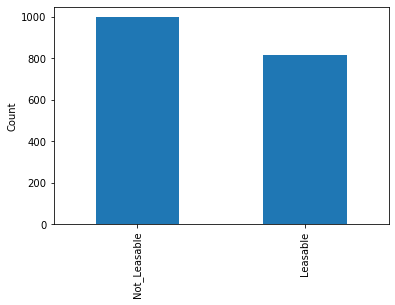

In [67]:
import matplotlib.pyplot as plt

# Visualize class distribution

df_final["Is_Leasable"].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Not_Leasable', 'Leasable'])
plt.ylabel('Count');

In [68]:
df_final_for_model=pd.concat([df_final.pop('Array').apply(pd.Series), df_final['Is_Leasable']], axis=1)
df_final_for_model=df_final_for_model.fillna(0)
df_final_for_model.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,Is_Leasable
108,101,5746,15007,12782,2012,4819,2278,14142,2692,2102,...,0,0,0,0,0,0,0,0,0,1
376,101,2238,6140,2566,9289,2063,4241,19510,3104,102,...,0,0,0,0,0,0,0,0,0,0
784,101,19102,1044,4213,19961,2692,4143,2538,2818,2614,...,0,0,0,0,0,0,0,0,0,1
453,101,8133,7254,2461,2795,23095,2015,102,0,0,...,0,0,0,0,0,0,0,0,0,0
258,101,25988,26488,6557,2795,7190,102,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Generate indices for splits

test_ind = round(len(df_final_for_model)*0.25)
train_ind = test_ind + round(len(df_final_for_model)*0.05)
unlabeled_ind = train_ind + round(len(df_final_for_model)*0.70)


# Partition the data

test = df_final_for_model.iloc[:test_ind]
train = df_final_for_model.iloc[test_ind:train_ind]
unlabeled = df_final_for_model.iloc[train_ind:unlabeled_ind]


# Assign data to train, test, and unlabeled sets

X_train = train.drop("Is_Leasable",axis=1)
y_train = train["Is_Leasable"]

X_unlabeled = unlabeled.drop("Is_Leasable",axis=1)

X_test = test.drop("Is_Leasable",axis=1)
y_test = test["Is_Leasable"]


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (91, 52)
y_train dimensions: (91,)

X_test dimensions: (453, 52)
y_test dimensions: (453,)

X_unlabeled dimensions: (1269, 52)


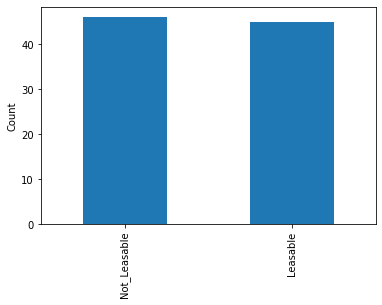

In [70]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Not_Leasable', 'Leasable'])
plt.ylabel('Count');

Train f1 Score: 0.7901234567901234
Test f1 Score: 0.8109339407744874


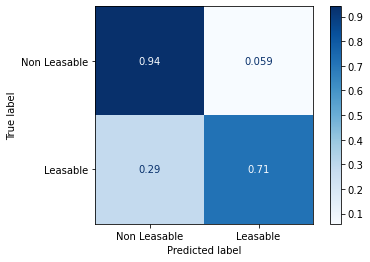

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

# Logistic Regression Classifier

clf = MultinomialNB()

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['Non Leasable', 'Leasable']);

In [72]:
# Generate probabilities for each prediction

clf.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.0

In [73]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0  and len(X_unlabeled)!=0:
        
    # Fit classifier and make train/test predictions
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob[df_pred_prob['prob_0'] > 0.90],
                           df_pred_prob[df_pred_prob['prob_1'] > 0.90]],
                          axis=0)
        
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.iloc[high_prob.index]])
    y_train = pd.concat([y_train, high_prob["preds"]])  
         
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.7901234567901234
Test f1: 0.8109339407744874
Now predicting labels for unlabeled data...
1269 high-probability predictions added to training data.
0 unlabeled instances remaining.



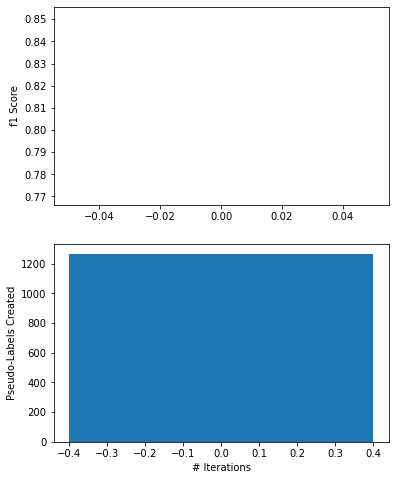

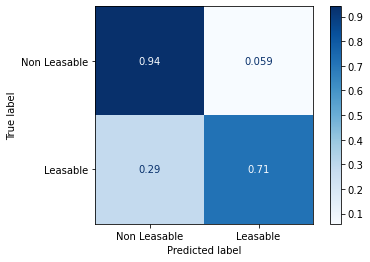

In [74]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['Non Leasable', 'Leasable']);